In [20]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [21]:
import numpy as np
import pandas as pd

In [22]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [23]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

%ls

 Volume in drive C is Acer
 Volume Serial Number is B4BA-9C48

 Directory of C:\Users\chutc\Documents\Class Work\UDEN201805DATA1-master\week11\HW

08/06/2018  01:32 PM    <DIR>          .
08/06/2018  01:32 PM    <DIR>          ..
07/31/2018  05:41 PM    <DIR>          .ipynb_checkpoints
08/06/2018  01:17 PM    <DIR>          __pycache__
08/06/2018  01:18 PM               451 application.py
08/06/2018  01:32 PM           170,000 climate_starter.ipynb
08/06/2018  01:17 PM               465 dbsetup.py
07/31/2018  05:39 PM    <DIR>          Images
07/27/2018  07:43 AM    <DIR>          Instructions
07/31/2018  05:39 PM             5,165 README.md
07/31/2018  05:39 PM    <DIR>          Resources
               4 File(s)        176,081 bytes
               7 Dir(s)  151,248,453,632 bytes free


In [24]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [25]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [26]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [27]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [28]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [29]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

last_day = '2017-08-23'

# Calculate the date 1 year ago from today

one_year_ago = '2016-08-23'

In [30]:
# Perform a query to retrieve the data and precipitation scores

first_row = session.query(Measurement).first()
first_row.__dict__.get('prcp')

one_year_prcp = session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs)\
.filter(Measurement.date >= '2016-08-23').all()
one_year_prcp[0]

('USC00519397', '2016-08-23', 0.0, 81.0)

In [31]:
# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(one_year_prcp, columns=['station', 'date', 'prcp', 'tobs'])
# df.set_index('date', inplace=True)
df.head()

,station,date,prcp,tobs
0,USC00519397,2016-08-23,0.00,81.0
1,USC00519397,2016-08-24,0.08,79.0
2,USC00519397,2016-08-25,0.08,80.0
3,USC00519397,2016-08-26,0.00,79.0
4,USC00519397,2016-08-27,0.00,77.0


In [32]:
# Sort the dataframe by date
df.sort_values('date', inplace=True)
df.head()

,station,date,prcp,tobs
0,USC00519397,2016-08-23,0.00,81.0
1009,USC00517948,2016-08-23,NaN,80.0
1529,USC00519281,2016-08-23,1.79,77.0
704,USC00514830,2016-08-23,0.05,80.0
361,USC00513117,2016-08-23,0.15,76.0


In [33]:
from datetime import datetime

def convert_date_to_datetime(string_time):
    return datetime.strptime(string_time,'%Y-%m-%d')

df['datetime'] = df.date.map(convert_date_to_datetime)

In [34]:
df.head()

,station,date,prcp,tobs,datetime
0,USC00519397,2016-08-23,0.00,81.0,2016-08-23
1009,USC00517948,2016-08-23,NaN,80.0,2016-08-23
1529,USC00519281,2016-08-23,1.79,77.0,2016-08-23
704,USC00514830,2016-08-23,0.05,80.0,2016-08-23
361,USC00513117,2016-08-23,0.15,76.0,2016-08-23


<IPython.core.display.Javascript object>


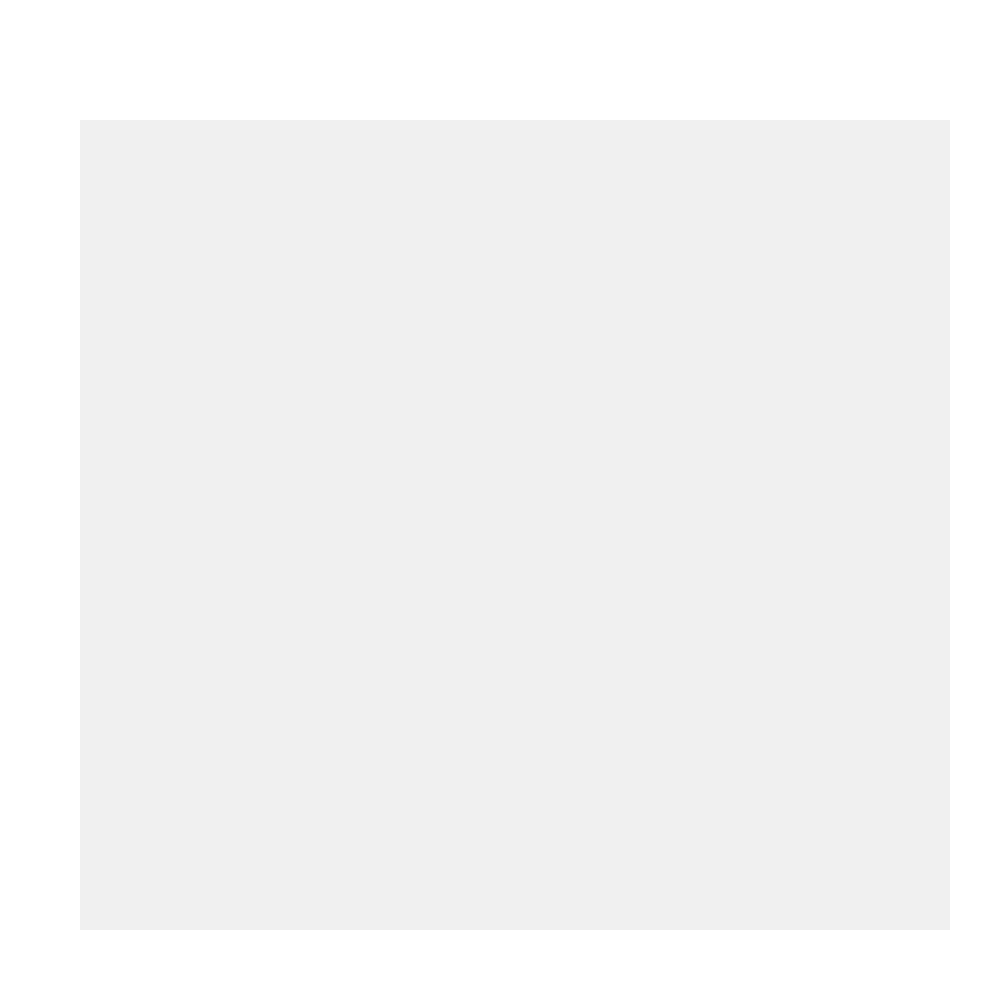

(array([736238., 736299., 736361., 736420., 736481., 736542.]),
 <a list of 6 Text xticklabel objects>)

In [35]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 10), dpi=80)
plt.plot(df['datetime'], df['prcp'])
plt.title('Hawaii Precipiation from 8/23/16-8/23/17')
plt.xlabel('Date')
plt.ylabel('Precipitaion')
# Rotate the xticks for the dates
plt.xticks(rotation=45)

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp,tobs
count,2021.000000,2230.000000
mean,0.177279,74.590583
std,0.461190,4.611667
min,0.000000,58.000000
25%,0.000000,72.000000
50%,0.020000,75.000000
75%,0.130000,78.000000
max,6.700000,87.000000


In [36]:
# How many stations are available in this dataset? using sqlalchemy
stations = []
for value in session.query(Measurement.station).distinct():
    stations.append(value)
    
len(stations)

9

In [37]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [38]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
    .filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [39]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Plot the results as a histogram with bins=12

station_281 = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == 'USC00519281')\
.filter(Measurement.date >= '2016-08-23').all()    

In [40]:
tobs = []

for x in station_281:
    tobs.append(x[1])

In [41]:
plt.hist(tobs, bins=12)
plt.title('USC00519281 Temp Observations')
plt.ylabel('Frequency')
plt.xlabel('Temp (F)')
plt.show(tobs)

In [42]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [43]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start_date = '2016-07-01'
end_date = '2016-07-05'

trip_temps = calc_temps(start_date, end_date)

print(trip_temps)

[(71.0, 77.22222222222223, 82.0)]


In [44]:
tmin = trip_temps[0][0]
tavg = trip_temps[0][1]
tmax = trip_temps[0][2]

<IPython.core.display.Javascript object>


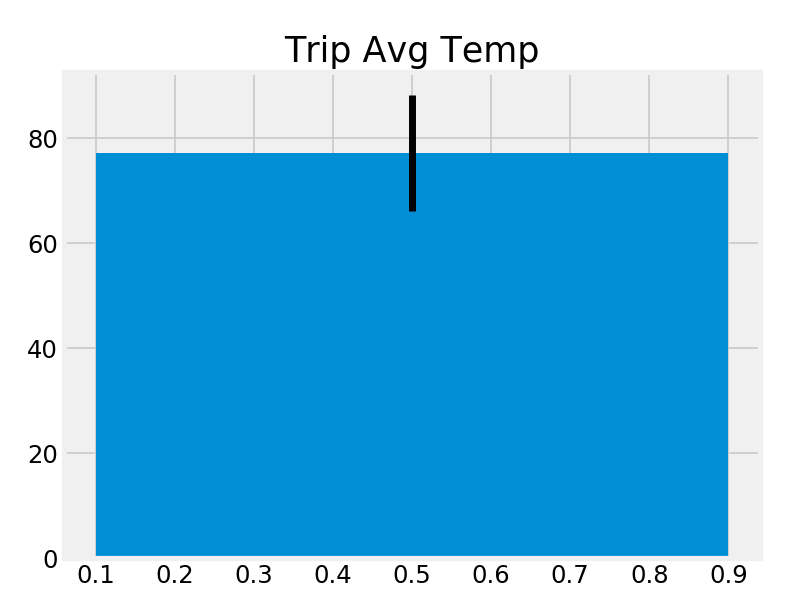

<Container object of 1 artists>

In [45]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.figure()
plt.title("Trip Avg Temp")
plt.bar(.5, tavg, yerr=(tmax-tmin))

In [28]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

session.query(Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp))\
    .group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc())\
    .filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

[('USC00519281',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  4.680000000000001),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  4.050000000000001),
 ('USC00519523',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  2.880000000000001),
 ('USC00513117',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  1.7100000000000006),
 ('USC00519397',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  0.5400000000000001),
 ('USC00514830',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  0.0),
 ('USC00517948',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  None)]

## Optional Challenge Assignment

In [46]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [47]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
normals = []
normals.append(daily_normals("07-01")[0])
normals.append(daily_normals("07-02")[0])
normals.append(daily_normals("07-03")[0])
normals.append(daily_normals("07-04")[0])
normals.append(daily_normals("07-05")[0])

normals

[(67.0, 74.77777777777777, 81.0),
 (68.0, 75.40384615384616, 82.0),
 (68.0, 75.32075471698113, 87.0),
 (70.0, 76.57142857142857, 81.0),
 (66.0, 75.0, 81.0)]

In [48]:
# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [49]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
trip_df = pd.DataFrame(normals, columns=['tmin', 'tavg', 'tmax'])
trip_df.head()

,tmin,tavg,tmax
0,67.0,74.777778,81.0
1,68.0,75.403846,82.0
2,68.0,75.320755,87.0
3,70.0,76.571429,81.0
4,66.0,75.000000,81.0


In [50]:
dates = ['07-01', '07-02', '07-03', '07-04', '07-05']
trip_df['date'] = dates
trip_df.head()

,tmin,tavg,tmax,date
0,67.0,74.777778,81.0,07-01
1,68.0,75.403846,82.0,07-02
2,68.0,75.320755,87.0,07-03
3,70.0,76.571429,81.0,07-04
4,66.0,75.000000,81.0,07-05


In [51]:
# Plot the daily normals as an area plot with `stacked=False`


In [67]:
# Query for the dates and temperature observations from the last year.

weather_rows = engine.execute("""
    SELECT m.date, avg(m.tobs) as temp
    from Measurement m
    WHERE strftime('%Y', m.date) = "2017"
    GROUP BY 1
    ORDER BY 1
    """).fetchall()

vals = {k:v for k,v in weather_rows}

In [69]:
#[dict(x) for x in weather_rows]

In [70]:
vals

{'2017-01-01': 69.33333333333333,
 '2017-01-02': 69.2,
 '2017-01-03': 67.66666666666667,
 '2017-01-04': 67.16666666666667,
 '2017-01-05': 67.5,
 '2017-01-06': 67.66666666666667,
 '2017-01-07': 70.16666666666667,
 '2017-01-08': 67.66666666666667,
 '2017-01-09': 67.71428571428571,
 '2017-01-10': 66.71428571428571,
 '2017-01-11': 69.33333333333333,
 '2017-01-12': 69.16666666666667,
 '2017-01-13': 69.33333333333333,
 '2017-01-14': 71.0,
 '2017-01-15': 69.8,
 '2017-01-16': 72.33333333333333,
 '2017-01-17': 70.5,
 '2017-01-18': 73.28571428571429,
 '2017-01-19': 72.85714285714286,
 '2017-01-20': 71.0,
 '2017-01-21': 71.5,
 '2017-01-22': 71.2,
 '2017-01-23': 73.0,
 '2017-01-24': 70.33333333333333,
 '2017-01-25': 71.0,
 '2017-01-26': 71.14285714285714,
 '2017-01-27': 68.0,
 '2017-01-28': 68.0,
 '2017-01-29': 69.4,
 '2017-01-30': 68.42857142857143,
 '2017-01-31': 68.28571428571429,
 '2017-02-01': 68.0,
 '2017-02-02': 64.14285714285714,
 '2017-02-03': 66.0,
 '2017-02-04': 70.2,
 '2017-02-05': 74.

In [77]:
station_list = {}
station_list['data'] = []

for row in session.query(Station):
    station_list['data'].append(
            {'id': row.id,
            'station': row.station,
            'lat': row.latitude,
            'lng' : row.longitude,
            'elev' : row.elevation})
    return jsonify(station_list)

In [ ]:
# /api/v1.0/tobs
# Return a JSON list of Temperature Observations (tobs) for the previous year

for row in session.query(Measurement):
    